# DataFrame Interpolation and Merging Examples

Reference: [https://stackabuse.com/how-to-merge-dataframes-in-pandas/](https://stackabuse.com/how-to-merge-dataframes-in-pandas/)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import w2

In [3]:
t1 = np.array([0, 0.5, 1.0, 1.5, 2.0])
y1 = pd.Series(2*t1, index=t1)

t2 = np.array([0, 0.34, 1.01, 1.4, 1.6, 1.7, 2.01])
y2 = pd.Series(3*t2, index=t2)

df = pd.DataFrame({'y1': y1, 'y2': y2})
display(df)

,y1,y2
0.00,0.0,0.00
0.34,NaN,1.02
0.50,1.0,NaN
1.00,2.0,NaN
1.01,NaN,3.03
1.40,NaN,4.20
1.50,3.0,NaN
1.60,NaN,4.80
1.70,NaN,5.10
2.00,4.0,NaN


In [4]:
# Experiments
df_interp = df.interpolate('index')
display(df_interp)

df_interp = df.interpolate('index').reindex(t2)
display(df_interp)

df_interp = df.interpolate('index').reindex(np.array([0.25, 0.75, 1.25, 1.75]))
display(df_interp)

# This is desired solution
df_interp = df.interpolate('index').reindex(t1)
display(df_interp)

,y1,y2
0.00,0.00,0.00
0.34,0.68,1.02
0.50,1.00,1.50
1.00,2.00,3.00
1.01,2.02,3.03
1.40,2.80,4.20
1.50,3.00,4.50
1.60,3.20,4.80
1.70,3.40,5.10
2.00,4.00,6.00


,y1,y2
0.00,0.00,0.00
0.34,0.68,1.02
1.01,2.02,3.03
1.40,2.80,4.20
1.60,3.20,4.80
1.70,3.40,5.10
2.01,4.00,6.03


,y1,y2
0.25,NaN,NaN
0.75,NaN,NaN
1.25,NaN,NaN
1.75,NaN,NaN


,y1,y2
0.0,0.0,0.0
0.5,1.0,1.5
1.0,2.0,3.0
1.5,3.0,4.5
2.0,4.0,6.0


In [5]:
met_wb1 = w2.sql_query('w2_data.db', 'select * from MET_WB1')
ctr_tr2 = w2.sql_query('w2_data.db', 'select * from CTR_TR2')
display(met_wb1)
display(ctr_tr2)

,Air Temperature,Dew Point Temperature,Wind Speed,Wind Direction,Cloudiness,Solar Radiation
Date,,,,,,
2017-01-01 00:00:00,1.0,-4.5,4.78,4.71,8.7,0
2017-01-01 01:00:00,1.0,-4.5,4.78,4.71,8.7,0
2017-01-01 02:00:00,0.4,-5.1,3.96,4.69,1.1,0
2017-01-01 03:00:00,-0.7,-5.6,3.38,4.46,0.0,0
2017-01-01 04:00:00,-1.7,-6.1,2.10,3.96,0.2,0
...,...,...,...,...,...,...
2017-12-31 20:00:00,-13.9,-15.6,2.30,4.54,1.2,0
2017-12-31 21:00:00,-14.0,-16.3,2.68,4.49,1.6,0
2017-12-31 22:00:00,-14.6,-17.3,2.68,4.21,3.8,0


,TDS,ISS,OP,NH3,NOx,LDOM,RDOM,LPOM,RPOM,DO
Date,,,,,,,,,,
2017-01-01 00:00:00,988.0,5.8,0.784,0.140,31.500,0.00,0.00,3.60,0.90,7.10
2017-01-01 12:00:00,988.0,5.8,0.784,0.140,31.500,0.00,0.00,3.60,0.90,7.10
2017-01-02 12:00:00,1000.0,5.4,0.822,0.145,31.000,0.00,0.00,3.55,0.89,7.03
2017-01-03 12:00:00,1012.0,5.1,0.860,0.150,30.500,0.00,0.00,3.50,0.88,6.96
2017-01-04 12:00:00,999.2,5.1,0.901,0.190,30.000,0.00,0.00,3.10,0.78,6.86
...,...,...,...,...,...,...,...,...,...,...
2017-12-28 12:00:00,1253.7,1.2,0.100,0.058,37.219,5.41,62.22,3.84,0.96,6.13
2017-12-29 12:00:00,1253.3,1.4,0.100,0.067,36.938,5.26,60.44,4.48,1.12,6.12
2017-12-30 12:00:00,1253.0,1.6,0.100,0.075,36.656,5.10,58.66,5.12,1.28,6.74


In [6]:
merged1 = met_wb1.merge(ctr_tr2, left_index=True, right_index=True, how='outer', indicator=True)
merged2 = ctr_tr2.merge(met_wb1, left_index=True, right_index=True)
# merged3 = pd.merge(met_wb1, ctr_tr2, how='inner', left_index=True, right_index=True)
# merged4 = pd.merge(met_wb1, ctr_tr2, how='outer', left_index=True, right_index=True)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
# display(merged1)
# display(merged2)

In [7]:
# The interpolation flag we added above for QA/QC will 
# prevent linear interpolation from working, so we will remove
# the _merge column before interpolating.
merged1.drop('_merge', axis=1, inplace=True)
merged1 = merged1.interpolate('time')

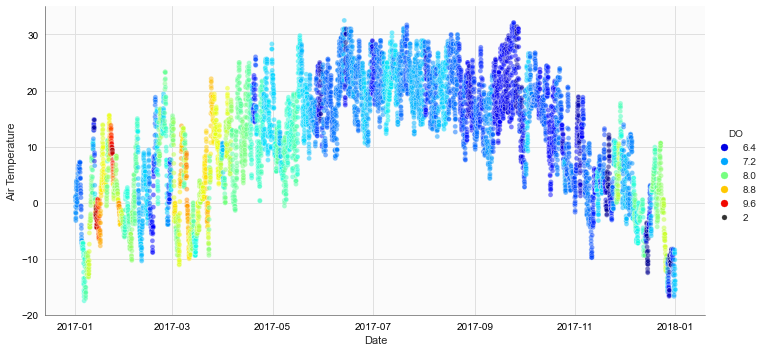

In [8]:
sns.relplot(data=merged1, x=merged1.index, y='Air Temperature', hue='DO', aspect=2, palette=mpl.cm.jet, alpha=0.5, size=2)

(0.0, 14.0)

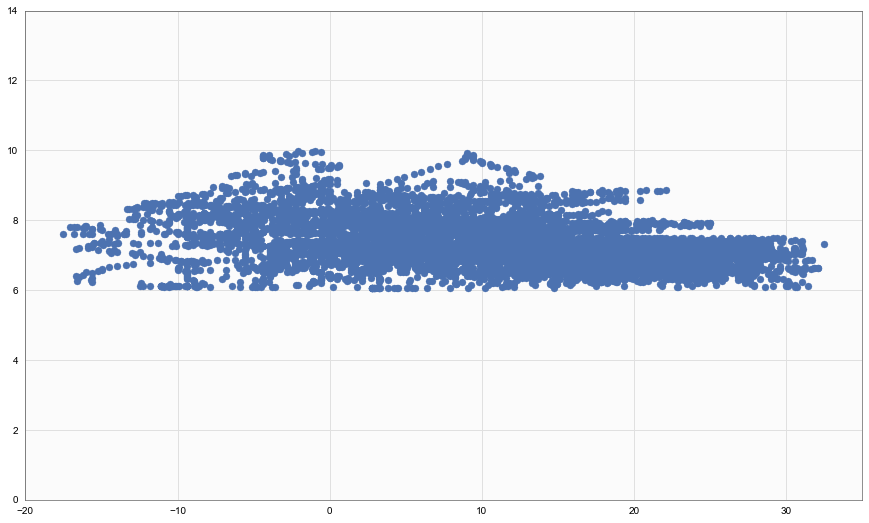

In [9]:
import matplotlib.pyplot as plt
ax = plt.scatter(merged1['Air Temperature'], merged1['DO'])
plt.ylim([0, 14])

(0.0, 14.0)

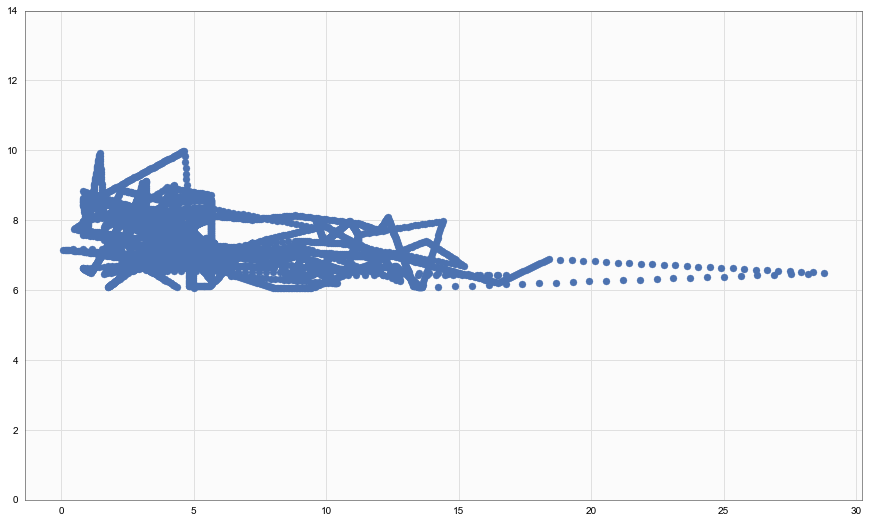

In [10]:
merged1['POM'] = merged1.RPOM + merged1.LPOM
ax = plt.scatter(merged1['POM'], merged1['DO'])
plt.ylim([0, 14])